Comenzaremos importando las librerías que nos asistirán para ejecutar el algoritmo y graficar.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

Importamos el archivo csv -para simplificar, suponemos que el archivo se encuentra en el mismo directorio que el notebook- y vemos los primeros 5 registros del archivo tabulados.

In [39]:
dataframe = pd.read_csv(r"analisis.csv")
dataframe.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [40]:
dataframe.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


Para saber cuantos registros tenemos de cada uno hacemos:

In [41]:
print(dataframe.groupby('categoria').size())

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


Veremos graficamente nuestros datos para tener una idea de la dispersión de los mismos:

C:\Users\koda_\AppData\Local\Temp\ipykernel_16784\928770594.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataframe.drop(['categoria'],1).hist()


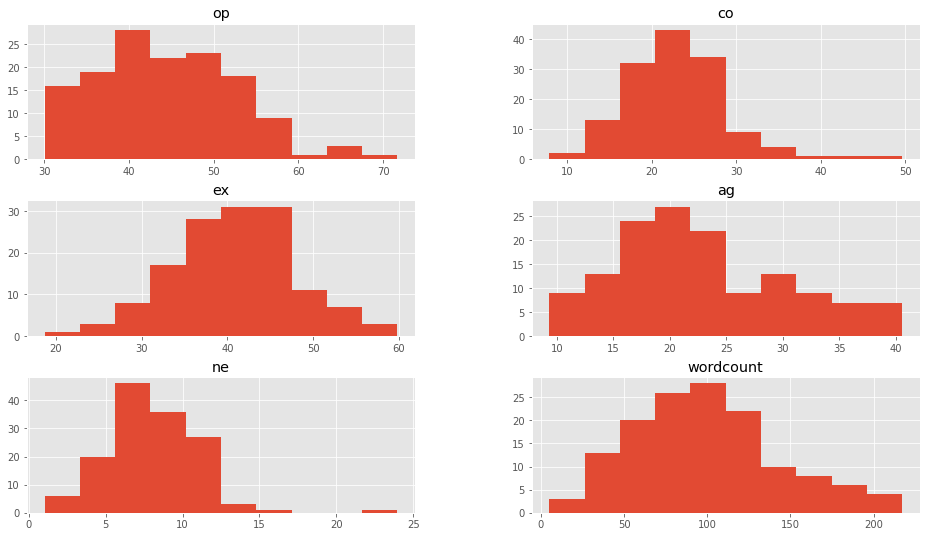

In [42]:
dataframe.drop(['categoria'],1).hist()
plt.show()

En este caso seleccionamos 3 dimensiones: op, ex y ag y las cruzamos para ver si nos dan alguna pista de su agrupación y la relación con sus categorías.

C:\Users\koda_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


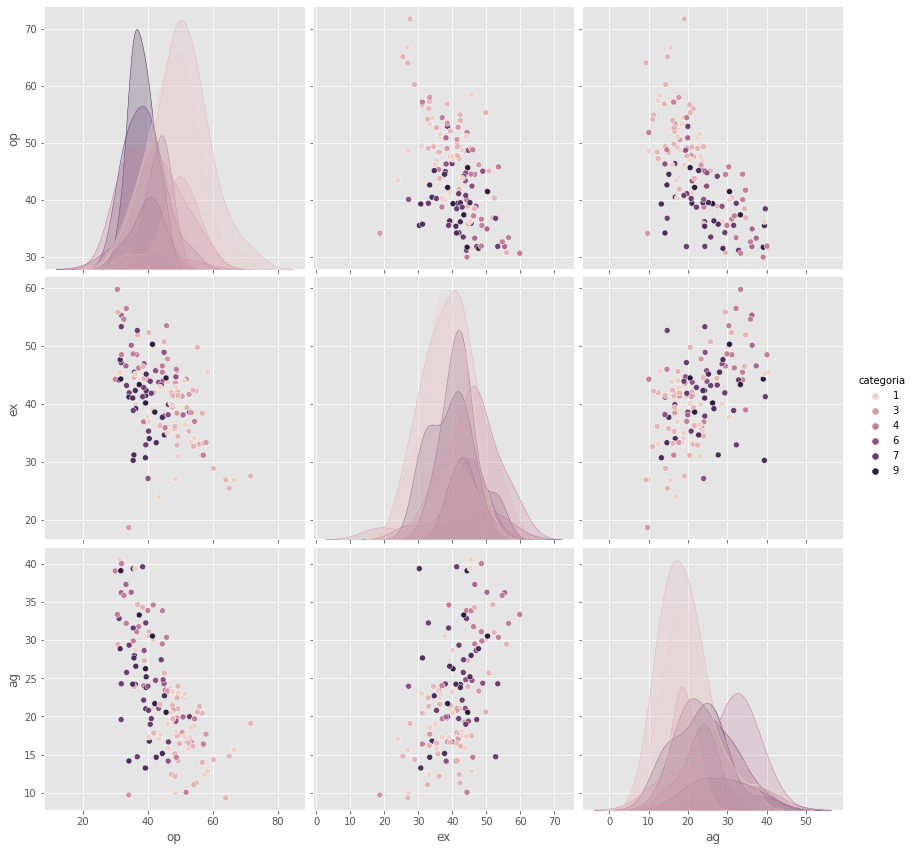

In [43]:
sb.pairplot(dataframe.dropna(), hue='categoria',size=4,vars=["op","ex","ag"],kind='scatter')

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^Graficas de arriba^^^^^^^^^^^^^^^^^^^^^^^^^^^
Revisando la gráfica no pareciera que haa algún tipo de agrupación o correlación entre los usuarios y sus categorías.

Concretamos la estructura de datos que utilizaremos para alimentar el algoritmo. Como se ve, sólo cargamos las columnas op, ex y ag en nuestra variable X.

In [44]:
X = np.array(dataframe[["op","ex","ag"]])
y = np.array(dataframe['categoria'])
X.shape

(140, 3)

Ahora veremos una gráfica en 3D con 9 colores representando las categorías.

C:\Users\koda_\AppData\Local\Temp\ipykernel_16784\393843697.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


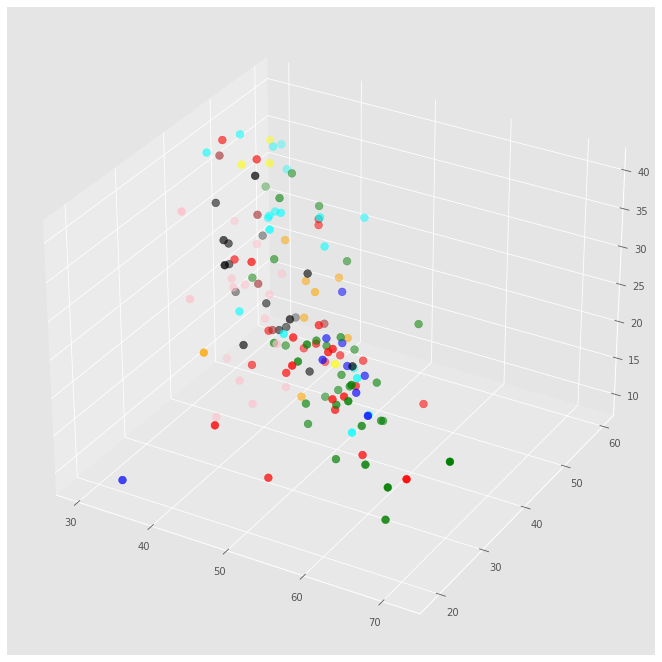

In [45]:

fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

Vamos a hallar el valor de K haciendo una gráfica e intentando hallar el “punto de codo” que comentábamos antes. Este es nuestro resultado:

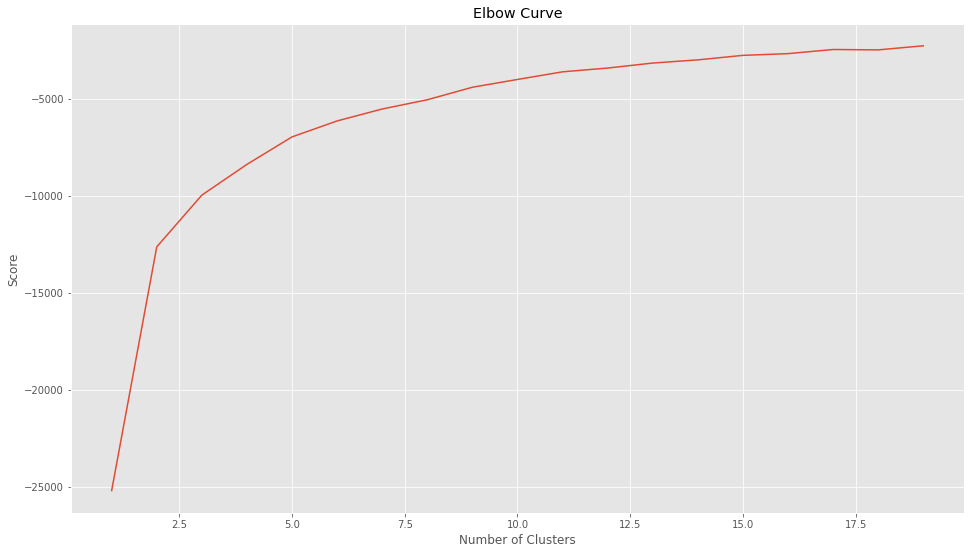

In [46]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


^^^^^^^^^^^^^^^^^^^^^^^^^^^Grafica de arriba^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Realmente la curva es bastante “suave”. Considero a 5 como un buen número para K. Según vuestro criterio podría ser otro.

Ejecutamos el algoritmo para 5 clusters y obtenemos las etiquetas y los centroids.

In [47]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[50.15530371 40.81295548 17.39048745]
 [35.39154169 47.17372597 34.50044186]
 [39.55874337 44.81190669 24.291027  ]
 [42.66891482 33.31008136 21.11530482]
 [58.70462307 30.53566167 15.72207033]]


Ahora veremos esto en una gráfica 3D con colores para los grupos y veremos si se diferencian: (las estrellas marcan el centro de cada cluster)

C:\Users\koda_\AppData\Local\Temp\ipykernel_16784\2196262672.py:11: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


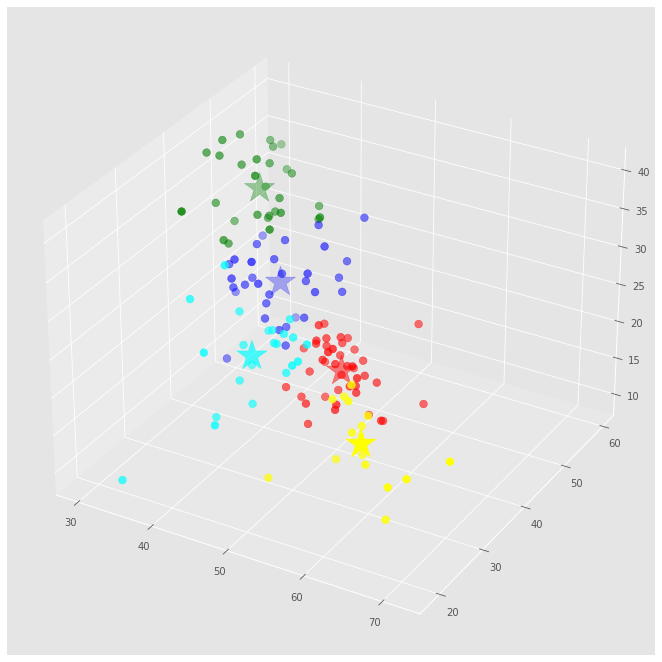

In [48]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

^^^^^^^^^^^^^^^^^^^^^^^^^^^Grafica de arriba^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Aqui podemos ver que el Algoritmo de K-Means con K=5 ha agrupado a los 140 usuarios Twitter por su personalidad, teniendo en cuenta las 3 dimensiones que utilizamos: Openess, Extraversion y Agreeablenes. Pareciera que no hay necesariamente una relación en los grupos con sus actividades de Celebrity

Haremos 3 gráficas en 2 dimensiones con las proyecciones a partir de nuestra gráfica 3D para que nos ayude a visualizar los grupos y su clasificación

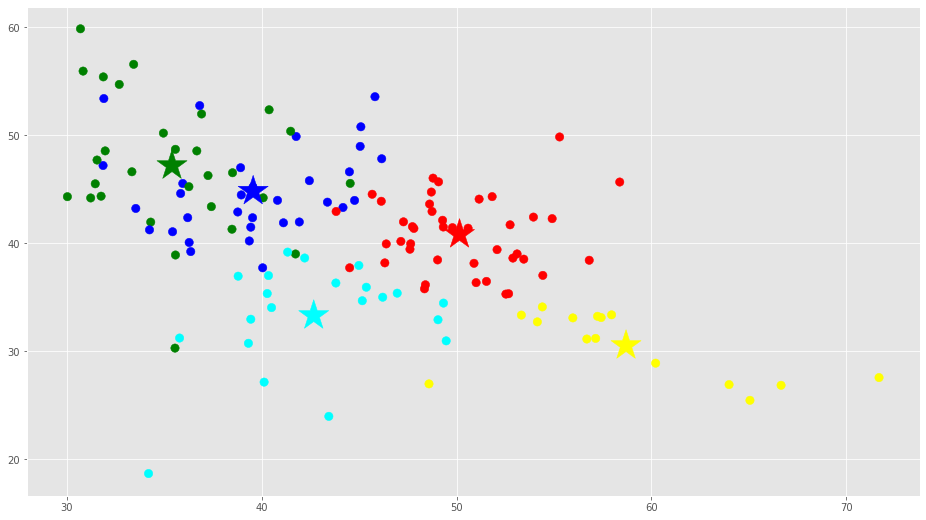

In [49]:
# Getting the values and plotting it
f1 = dataframe['op'].values
f2 = dataframe['ex'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

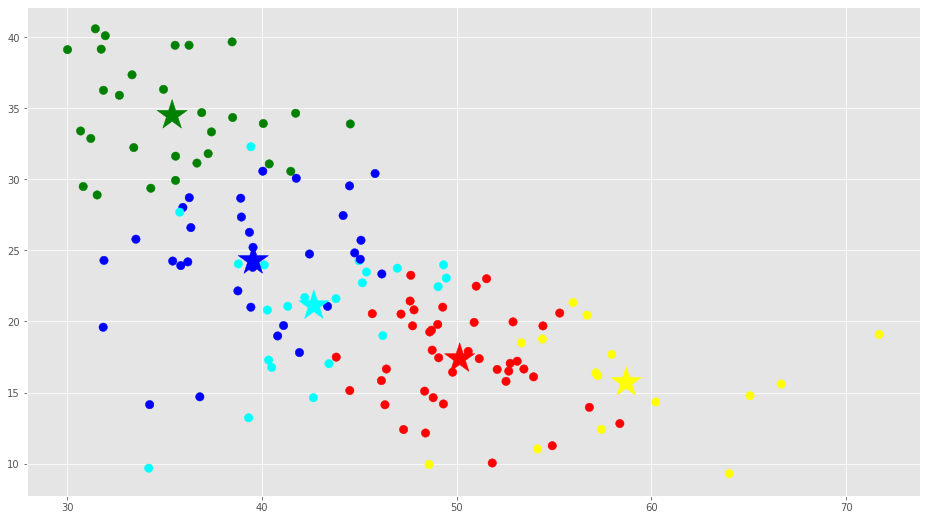

In [50]:
# Getting the values and plotting it
f1 = dataframe['op'].values
f2 = dataframe['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

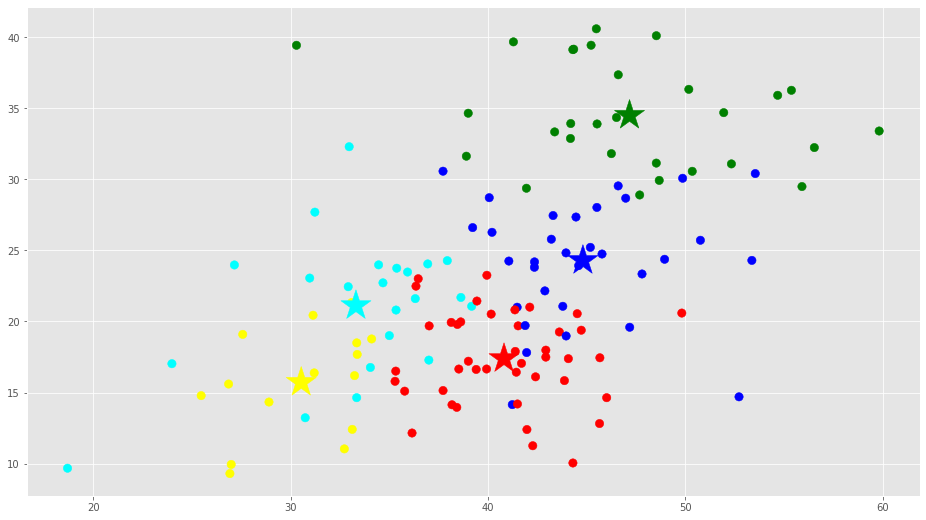

In [51]:
f1 = dataframe['ex'].values
f2 = dataframe['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

^^^^^^^^^^^^^^^^^^^^^^^En las graficas de arriba^^^^^^^^^^^^^^^^^^^^^^^^^^^
En estas gráficas vemos que están bastante bien diferenciados los grupos.

Podemos ver cada uno de los clusters cuantos usuarios tiene:

In [52]:
copy =  pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,42
1,green,29
2,blue,32
3,cyan,22
4,yellow,15


Y podemos ver la diversidad en rubros laborales de cada uno. Por ejemplo en el grupo 0 (rojo), vemos que hay de todas las actividades laborales aunque predominan de actividad 1 y 2 correspondiente a Actores y Cantantes con 11 y 15 famosos.

In [53]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,11.0
2,2,15.0
3,3,6.0
4,4,3.0
5,5,1.0
6,6,2.0
7,7,2.0
8,8,1.0
9,9,1.0


Buscaremos los usuarios que están más cerca a los centroids de cada grupo que podríamos decir que tienen los rasgos de personalidad característicos que representan a cada cluster:

Personal Reflection

The K-means algorithm will help us to create clusters when we have large groups of unlabeled data, when we want to try to discover new relationships between features or to test or reject hypotheses we have about our business.

Caution: There may be cases in which there are no natural groups, or clusters that contain a real reason for being. Although K-means will always provide us with "k clusters", it will be up to our criteria to recognize their usefulness or to review our features and discard those that are not useful or get new ones. Also keep in mind that in this example we are using the Euclidean distance as a measure of similarity between features, but we can use other functions that may yield better results (such as Manhattan, Lavenshtein, Mahalanobis, etc).

